# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#introduction">1. Introduction</a></li>
<li><a href="#data-wrangling">2. Data Wrangling</a> </li>
<li><a href="#exploratory-data-analysis">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a> </li>
</ul>

## 1. Introduction <a id='introduction'></a>
### 1.1. Dataset Overview
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Link dataset: https://www.kaggle.com/datasets/joniarroba/noshowappointments

### 1.2. Data Description
PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
- `PatientId`: Identification of a patient
- `AppointmentID`: Identification of each appointment
- `Gender`: Male or Female (M/F). Female is the greater proportion, woman takes way more care of they health in comparison to man.
- `ScheduledDay`: The day someone called or registered the appointment, this is before appointment of course.
- `AppointmentDay`: The day of the actual appointment, when they have to visit the doctor.
- `Age`: How old is the patient.
- `Neighborhood`: Where the appointment takes place.
- `Scholarship`: True or False (0/1). Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- `Hipertension`: True or False (0/1).
- `Diabetes`: True or False (0/1).
- `Alcoholism`: True or False (0/1).
- `Handcap`: True or False (0/1).
- `SMS_received`: 1 or more messages sent to the patient.
- Be careful about the encoding of the last column: it says `No` if the patient showed up to their appointment, and `Yes` if they did not show up.

### 1.3. Questions for Analysis
1. Data Wrangling:
- Does dataset have any missing or duplicate values?
- Does dataset have any outliers?
- Does dataset have any wrong data types?

2. Exploratory Data Analysis:
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- What are the relationship between the age, gender and the no-show rate?
- Are the patients who received SMS reminders more likely to show up for their scheduled appointment?
- What is the relationship between the no-show rate and the day of the week?

## 2. Data Wrangling <a id='data-wrangling'></a>

### 2.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.2. Read Data

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### 2.3. Assessing and Building Intuition

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Dataset has no missing values.
- Dataset has wrong type in `PatientId`. It should be integer instead of float.
- Dataset has wrong type in `ScheduledDay` and `AppointmentDay`. It should be datetime instead of string.

Optimize memory usage:
- Convert object to category for `Gender`, `Neighbourhood`, `No-show`.
- Convert int64 to int8 for `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `SMS_received`.

In [5]:
df['PatientId'] = df['PatientId'].astype('int64')
for column in df.columns:
    if df[column].dtype == 'object' and column not in ['PatiendId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']:
        df[column] = df[column].astype('category')
    if df[column].dtype == 'int64' and column not in ['PatiendId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']:
        df[column] = df[column].astype(np.iinfo(np.int8).dtype)
    if column in ['ScheduledDay', 'AppointmentDay']:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M:%SZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int8          
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  category      
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int8          
 6   Neighbourhood   110527 non-null  category      
 7   Scholarship     110527 non-null  int8          
 8   Hipertension    110527 non-null  int8          
 9   Diabetes        110527 non-null  int8          
 10  Alcoholism      110527 non-null  int8          
 11  Handcap         110527 non-null  int8          
 12  SMS_received    110527 non-null  int8          
 13  No-show         110527 non-null  category      
dtypes: category(3), datetime64[ns](2), i

In [6]:
df.nunique()

PatientId            256
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.describe()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,-0.831715,5.675305e+06,2016-05-09 07:49:15.846273024,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
min,-128.000000,5.030230e+06,2015-11-10 07:13:56,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-65.000000,5.640286e+06,2016-04-29 10:27:01,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,5.680573e+06,2016-05-10 12:13:17,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,5.725524e+06,2016-05-20 11:18:37,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,127.000000,5.790484e+06,2016-06-08 20:07:23,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
std,74.126471,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873


- Column `Age` has wrong values. It has negative values and we will remove these values.
- Column `Handcap` and `SMS_received` have wrong values at beginning. We will rename their headers.

In [8]:
df.duplicated().sum()

0

Dataset has no null values and no duplicate values.

In [9]:
df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [10]:
df['SMS_received'].value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

### 2.4. Cleaning Data

In [11]:
df = df[df['Age'] >= 0]
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'SMS_received', 'SMS_received': 'Handicap'}, inplace=True)
df.head()

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/3714256350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'SMS_received', 'SMS_received': 'Handicap'}, inplace=True)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Handicap,No-show
0,-88,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-90,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,47,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,118,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,55,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 3. Exploratory Data Analysis <a id='exploratory-data-analysis'></a>

array([<Axes: title={'center': 'F'}, ylabel='Frequency'>,
       <Axes: title={'center': 'M'}, ylabel='Frequency'>], dtype=object)

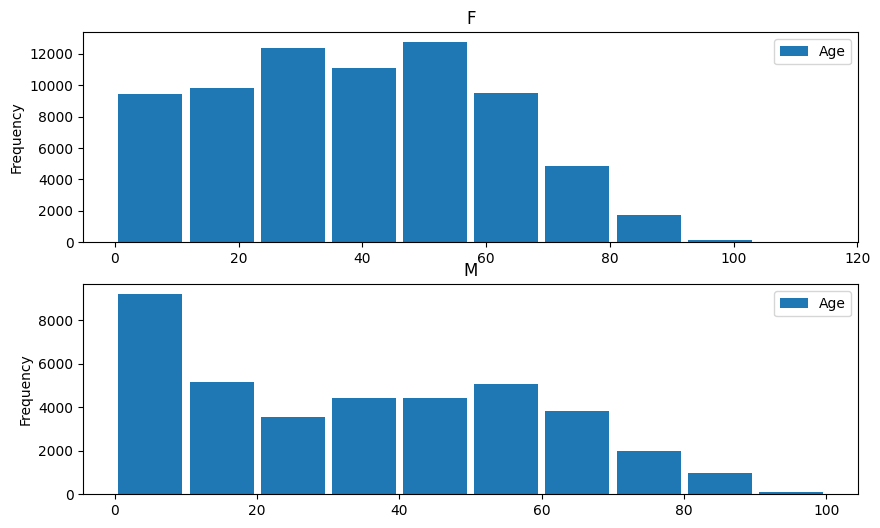

In [12]:
df.plot.hist(column='Age', by='Gender',bins=10, grid=False, rwidth=0.9, figsize=(10,6))

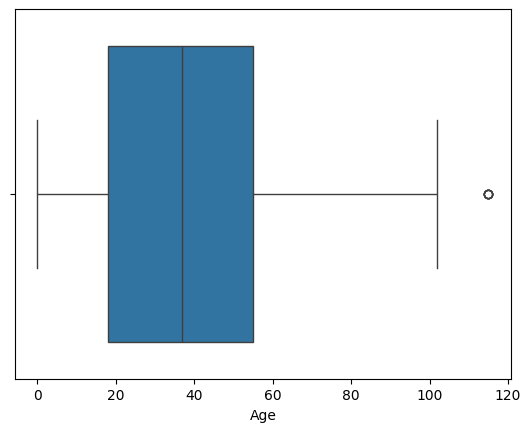

In [13]:
_ = sns.boxplot(x=df['Age'])

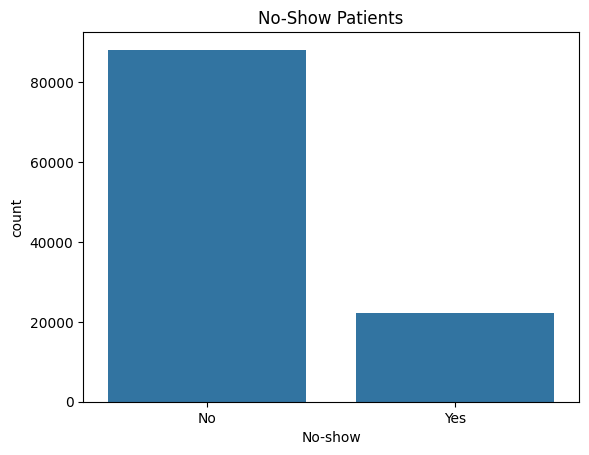

In [14]:
ax = sns.countplot(x=df['No-show'], data=df)
ax.set_title("No-Show Patients")
plt.show()

In [15]:
def plot_relationship(df, column_x, column_target, x_ticks_labels=None):
    ax = sns.countplot(x=df[column_x], hue=df[column_target], data=df)
    ax.set_title(f"No-Show for {column_x}")
    if x_ticks_labels:
        ax.set_xticklabels(x_ticks_labels)
    plt.show()

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


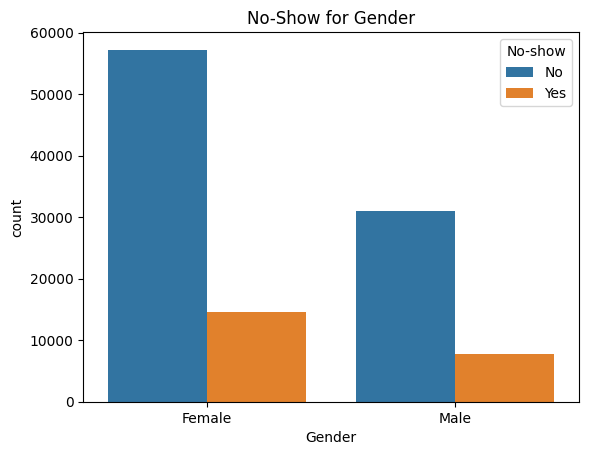

In [16]:
plot_relationship(
    df=df,
    column_x='Gender',
    column_target='No-show',
    x_ticks_labels=['Female', 'Male']
)

Female have more appointments than male, however the ratio no-show of them almost the same. So this factor is not important for us to know in order to predict if a patient will show up for their scheduled appointment.

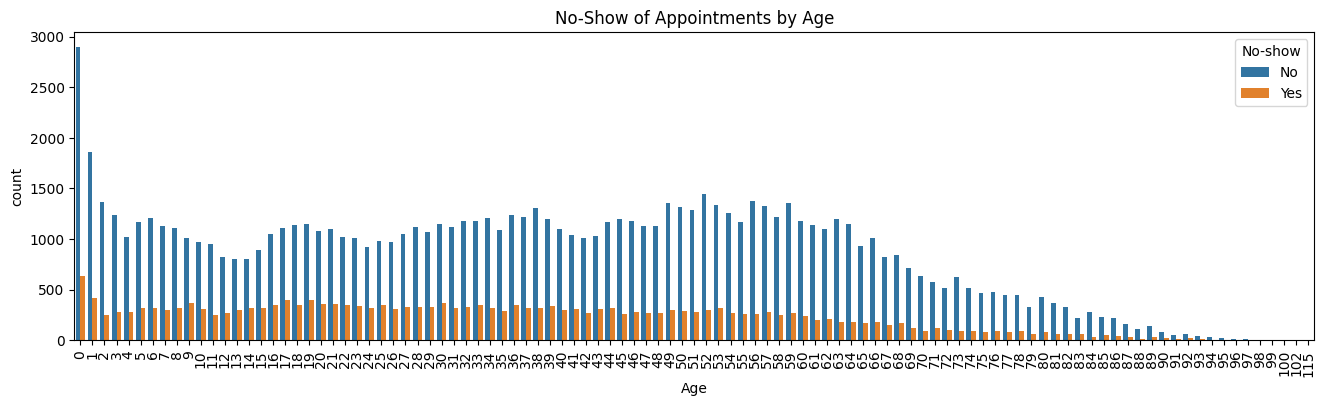

In [17]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Age'], hue=df['No-show'])
ax.set_title("No-Show of Appointments by Age")
plt.show()

We have left-skew figure in the relationship of age and no-show rate. It means that the older the patient, the more likely they will show up for their scheduled appointment.

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


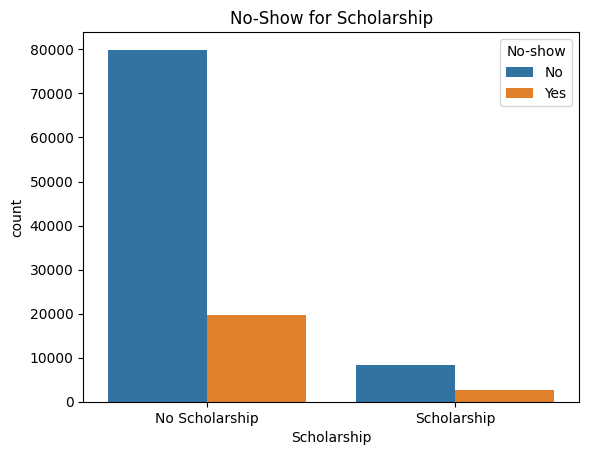

In [18]:
plot_relationship(
    df=df,
    column_x='Scholarship',
    column_target='No-show',
    x_ticks_labels=['No Scholarship', 'Scholarship']
)

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


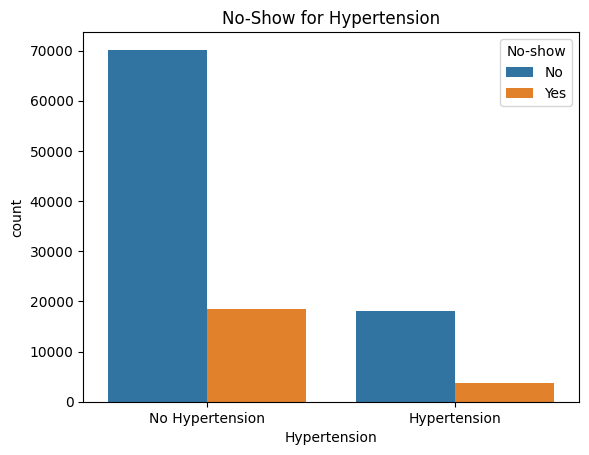

In [19]:
plot_relationship(
    df=df,
    column_x='Hypertension',
    column_target='No-show',
    x_ticks_labels=['No Hypertension', 'Hypertension']
)

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


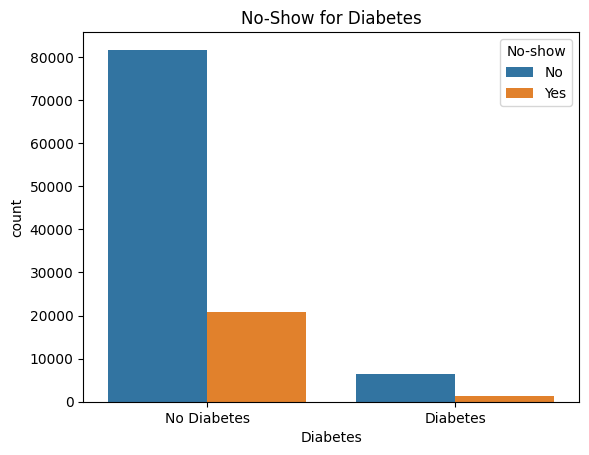

In [20]:
plot_relationship(
    df=df,
    column_x='Diabetes',
    column_target='No-show',
    x_ticks_labels=['No Diabetes', 'Diabetes']
)

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


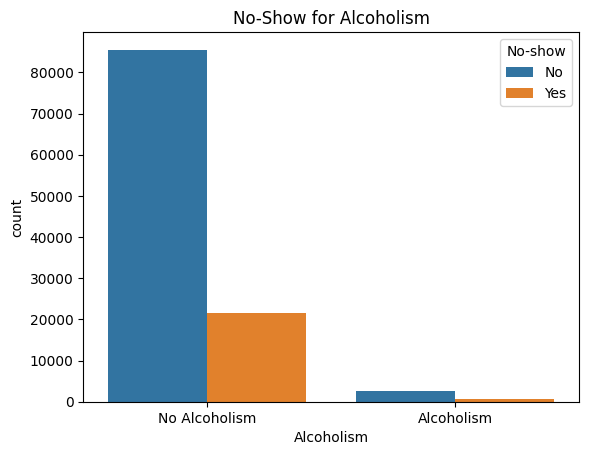

In [21]:
plot_relationship(
    df=df,
    column_x='Alcoholism',
    column_target='No-show',
    x_ticks_labels=['No Alcoholism', 'Alcoholism']
)

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/320285240.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


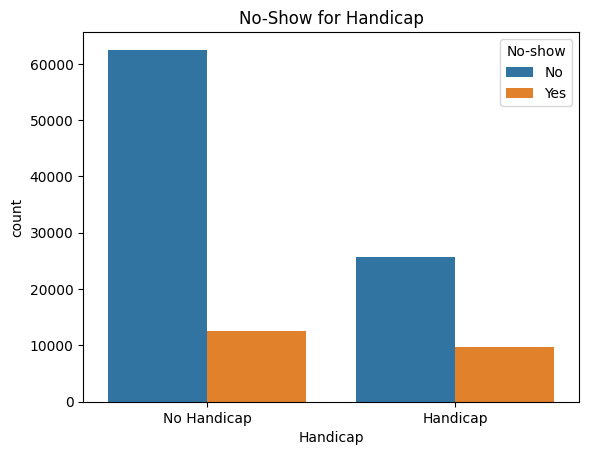

In [22]:
plot_relationship(
    df=df,
    column_x='Handicap',
    column_target='No-show',
    x_ticks_labels=['No Handicap', 'Handicap']
)

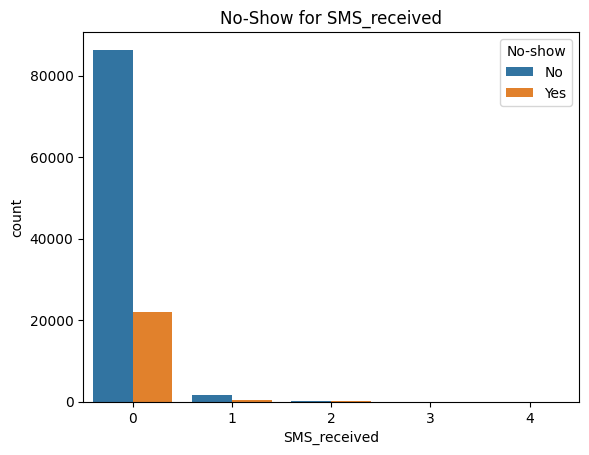

In [23]:
plot_relationship(
    df=df,
    column_x='SMS_received',
    column_target='No-show',
)

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_37907/3598223228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_sms_ratio.index, y=df_sms_ratio, palette="RdBu_r")


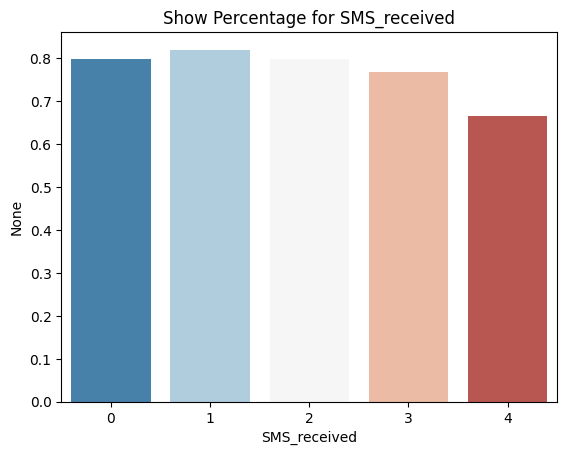

In [24]:
df_sms_ratio = df[df['No-show'] == 'No'].groupby(['SMS_received']).size()/df.groupby(['SMS_received']).size()
ax = sns.barplot(x=df_sms_ratio.index, y=df_sms_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMS_received")
plt.show()

We can see in figure above, the show rate of patients who received SMS reminders is higher than the show rate of patients who did not receive SMS reminders. So this factor is not important for us to know in order to predict if a patient will show up for their scheduled appointment.

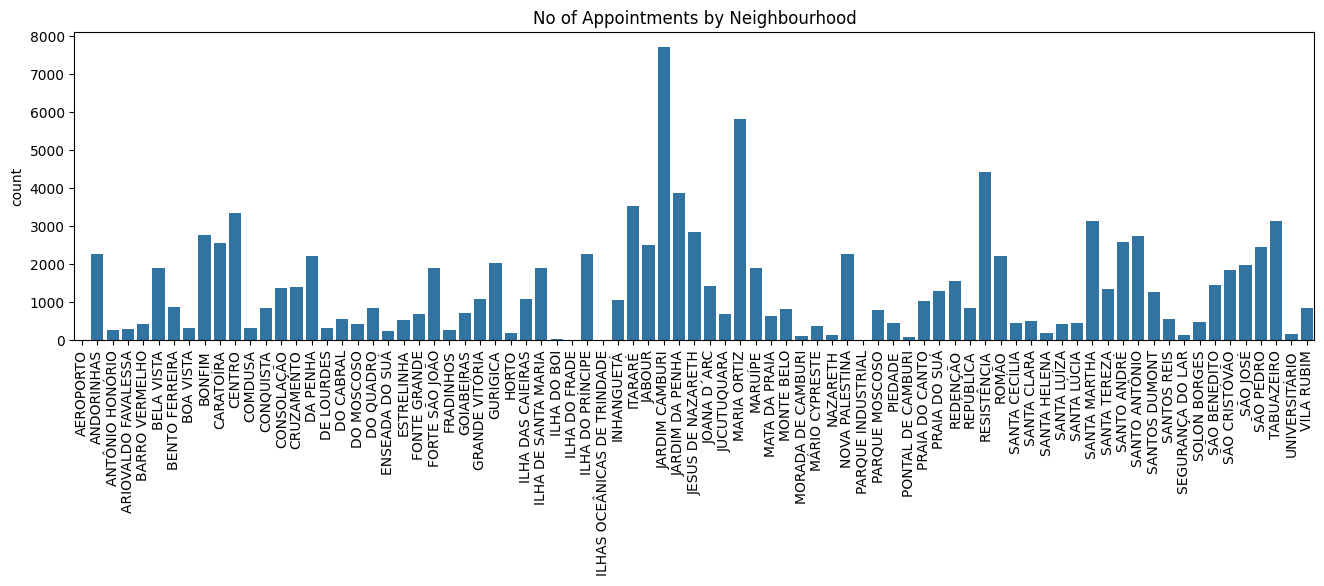

In [25]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df['Neighbourhood']))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

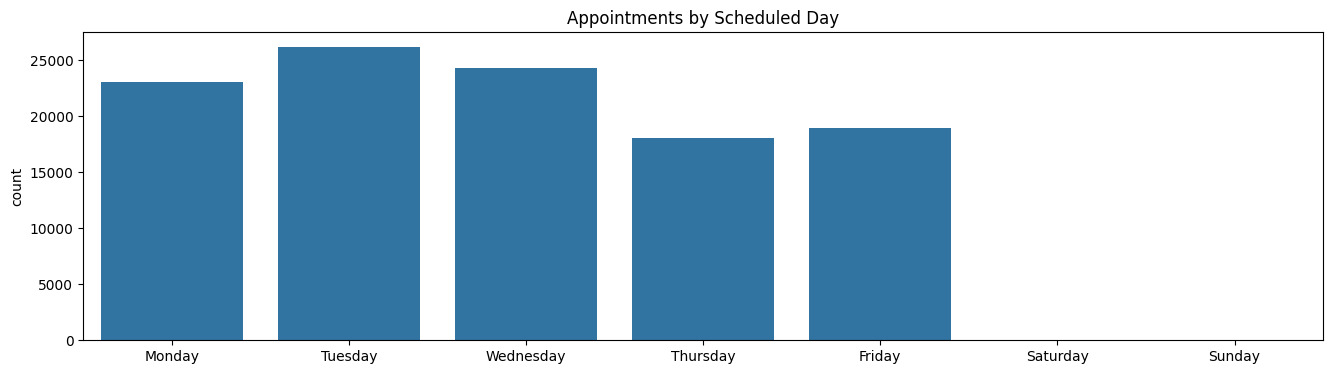

In [26]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16,4))
ax = sns.countplot(x=np.sort(df['ScheduledDay'].dt.day_name()), order=week_key)
ax.set_title("Appointments by Scheduled Day")
plt.show()

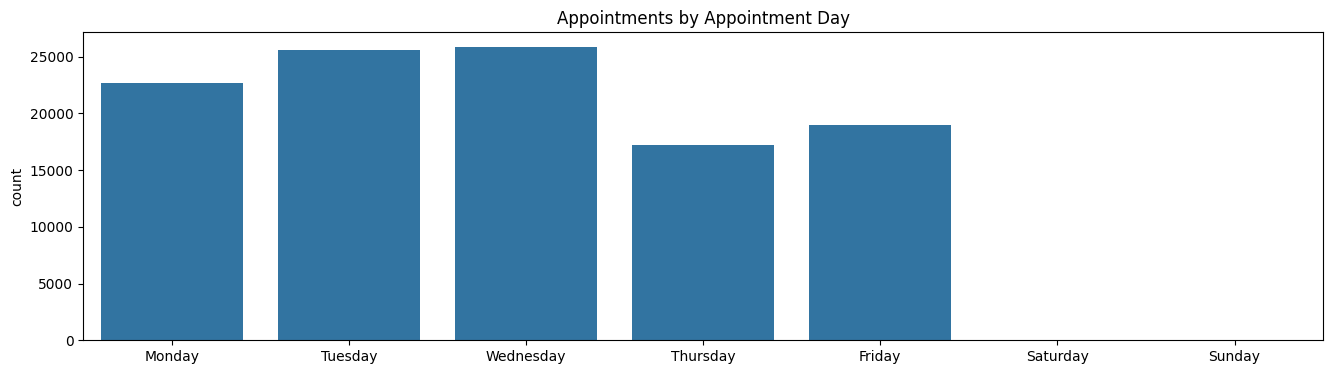

In [27]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=np.sort(df['AppointmentDay'].dt.day_name()), order=week_key)
ax.set_title("Appointments by Appointment Day")
plt.show()

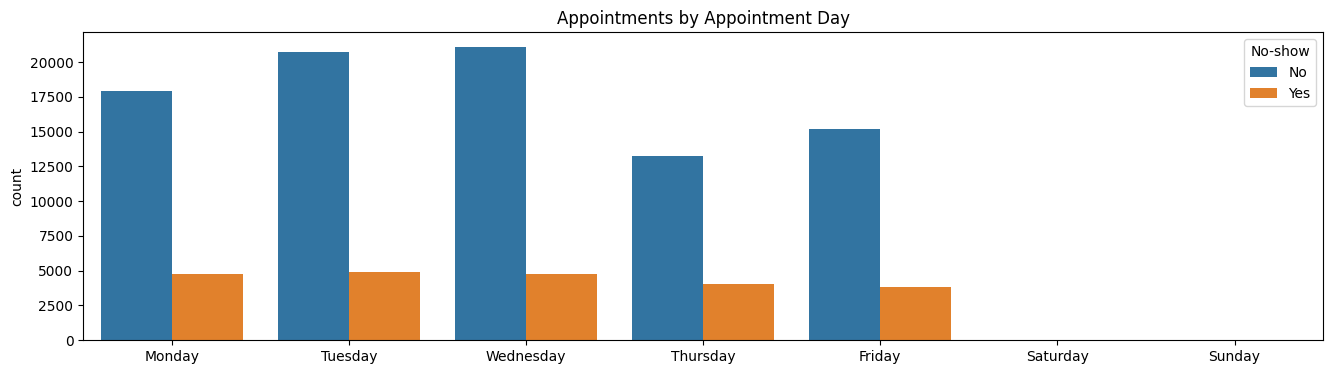

In [28]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=np.sort(df['AppointmentDay'].dt.day_name()), hue=df['No-show'], order=week_key)
ax.set_title("Appointments by Appointment Day")
plt.show()

We can see in figure above, the no-show rate of patients who have appointment on Wednesday is highest. It means the trend of no-show rate is increasing from Monday to Wednesday and then decreasing from Wednesday to Saturday. So this factor is important for us to know in order to predict if a patient will show up for their scheduled appointment.

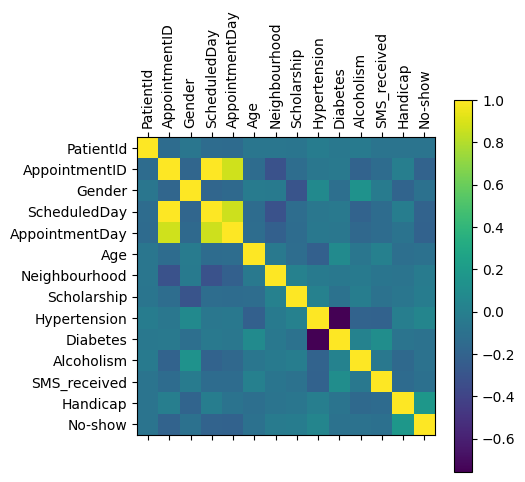

In [29]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.matshow(df_corr.corr())
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
cb = plt.colorbar()
cb.ax.tick_params()
plt.show()

## 4. Conclusions <a id='conclusions'></a>
### 4.1. Answer Questions
1. Data Wrangling:
Does dataset have any missing or duplicate values?
-> No.
Does dataset have any outliers?
-> Yes in column `Age`.
- Does dataset have any wrong data types?
-> Yes in column `PatientId`, `ScheduledDay` and `AppointmentDay`.

2. Exploratory Data Analysis:
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
-The age of patient.
-The day of the week of appointment.

What are the relationship between the age, gender and the no-show rate?
- Female have more appointments than male, however the ratio no-show of them almost the same. So this factor is not important for us to know in order to predict if a patient will show up for their scheduled appointment.
- We have left-skew figure in the relationship of age and no-show rate. It means that the older the patient, the more likely they will show up for their scheduled appointment.

What is the relationship between the no-show rate and the day of the week?
-> The no-show rate of patients who have appointment on Wednesday is highest. It means the trend of patient appointments is increasing from Monday to Wednesday and then decreasing from Wednesday to Friday.

Are the patients who received SMS reminders more likely to show up for their scheduled appointment?
-> Yes, the show rate of patients who received 2 and 3 SMS reminders is higher than the show rate of patients who did not receive SMS reminders.

### 4.2. Limitations
The dataset does not have enough information about the patient's health, financial situation, education, etc. Lacking these information makes it difficult to predict if a patient will show up for their scheduled appointment.
